In [5]:
import rasterio
import numpy as np
from affine import Affine
from pyproj import Proj, transform
import pyproj
# import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import h5py
# import pyhdf
# from pyhdf.SD import SD, SDC
# import re
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from PIL import Image
import scipy.stats as stats
import numpy.ma as ma

In [4]:
(0-5)/(10-5)

-1.0

In [101]:
qa_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180928_20200830_02_T1_QA_PIXEL.TIF')



In [146]:
# Define red, nir, and swir bands
red_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180115_20200902_02_T1_SR_B4.TIF')
nir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180115_20200902_02_T1_SR_B5.TIF')
swir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_118062_20180115_20200902_02_T1_SR_B7.TIF')

In [147]:
# convert to pandas dataframe
red = pd.DataFrame(np.array(red_im))
nir = pd.DataFrame(np.array(nir_im))
swir = pd.DataFrame(np.array(swir_im))

In [148]:
# convert fill value to nans
red=red.replace(0,np.nan)
nir=nir.replace(0,np.nan)
swir=swir.replace(0,np.nan)

In [149]:
# filter through only valid values and replace non-valid values with nans 
mask_red = (red >= 7273) & (red <= 43636) 
mask_nir = (nir >= 7273) & (nir <= 43636)
mask_swir = (swir >= 7273) & (swir <= 43636)

red = red[mask_red]
nir = nir[mask_nir]
swir = swir[mask_swir]

In [150]:
# Multiply by scale factor and add offset
red = (0.0000275*red) - 0.2
nir = (0.0000275*nir) - 0.2
swir = (0.0000275*swir) - 0.2

In [151]:
# DELETE IF NEEDED

red = np.asarray(red)
nir = np.asarray(nir)
swir = np.asarray(swir)

In [152]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# rows

# red_arr = np.delete(red,slice(4000,9999999),0)
# nir_arr = np.delete(nir,slice(4000,9999999),0)
# swir_arr = np.delete(swir,slice(4000,9999999),0)

# # columns

# red = np.delete(red_arr,slice(4000,9999999),1)
# nir = np.delete(nir_arr,slice(4000,9999999),1)
# swir = np.delete(swir_arr,slice(4000,9999999),1)


In [153]:
red = red[1200:2200,2700:3700]
nir = nir[1200:2200,2700:3700]
swir = swir[1200:2200,2700:3700]

In [154]:
# check if shape is same for all
print(red.shape)
print(nir.shape)
print(swir.shape)

(1000, 1000)
(1000, 1000)
(1000, 1000)


In [155]:
# Calculate NDVI and assign to variable
ndvi=(nir-red)/(nir+red)

In [156]:
# Delete
ndvi_arr = np.asarray(ndvi) 


In [157]:
# filter ndvi values
ndvi_arr[ndvi_arr < 0] = np.nan
ndvi_arr[ndvi_arr > 1] = np.nan 

In [158]:
ndvi = pd.DataFrame(ndvi_arr)

In [159]:
# convert swir back to array
swir_arr = np.asarray(swir)

In [160]:
# filter swir values
swir_arr[swir_arr < 0.01] = np.nan
swir_arr[swir_arr > 100] = np.nan

In [161]:
swir = pd.DataFrame(swir_arr)

In [162]:
# Calculate STR and assign to variable
str0=((1-swir)**2)/(2*swir)

In [163]:
# THIS IS WHAT TO DO FOR FILTERING SWIR
SWIR=pd.DataFrame(np.asarray(swir).flatten())

In [164]:
SWIR=SWIR.rename(columns={0:'SWIR'})

In [165]:
# END WHAT TO DO FOR FILTERING FOR SWIR

In [166]:
# START WHAT TO DO FOR FILTERING FOR NDVI

In [167]:
NDVI=pd.DataFrame(np.asarray(ndvi).flatten())

In [168]:
NDVI=NDVI.rename(columns={0:'NDVI'})

In [169]:
# (DELETE IF NEEDED)
NDVI['STR'] = ((1-SWIR['SWIR'])**2)/(2*SWIR['SWIR']) 

In [170]:
# MAIN DATAFRAME (DELETE IF NEEDED)
DF = NDVI
DF

,NDVI,STR
0,0.512383,2.710636
1,0.542571,3.389530
2,0.578933,4.076126
3,0.644690,5.249323
4,0.662822,5.679949
...,...,...
999995,0.584787,2.702780
999996,0.627701,2.940986
999997,0.626302,2.979578
999998,0.584083,2.804712


In [171]:
x_wet=np.linspace(0,1,100)
x_dry=np.linspace(0,1,100)

In [172]:
# convert to array and flatten ndvi and str
ndvi_flat=np.asarray(ndvi).flatten()
str0_flat=np.asarray(str0).flatten()

In [173]:
# convert both to list
ndvi_list = ndvi_flat.tolist()
str0_list = str0_flat.tolist()

In [174]:
# calculate STR max list (change "before" equation below accordingly)
str_max_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(30.134*ndvi_list[i])+5.856
            str_max_list.append(before)
    else:
        str_max_list.append(np.nan) 

In [175]:
# calculate STR min list (change "before" equation below accordingly)
str_min_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(2.121*ndvi_list[i])-0.296
            str_min_list.append(before)
    else:
        str_min_list.append(np.nan)

In [176]:
str0_max_arr = np.asarray(str_max_list)
str0_min_arr = np.asarray(str_min_list)

In [177]:
str_max = str0_max_arr.reshape((red.shape[0], red.shape[1]))
str_min = str0_min_arr.reshape((red.shape[0], red.shape[1]))

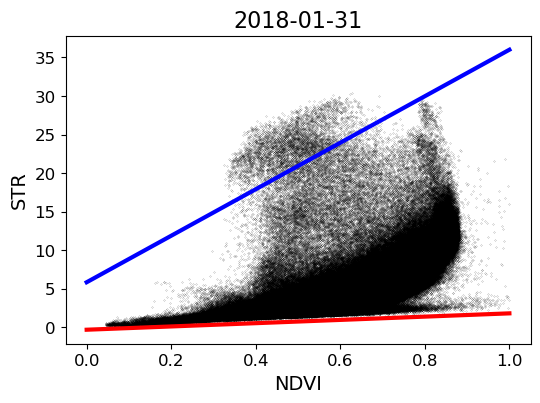

In [178]:
# plt.figure(figsize=(6,4))
# plt.title('2018-01-31',fontsize=16)
# plt.scatter(DF['NDVI'],DF['STR'],color='black',s=0.01)
# # plt.ylim(-1,100)
# # plt.xlim(0,1)
# plt.xlabel('NDVI',fontsize=14)
# plt.ylabel('STR',fontsize=14)
# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)
# # plt.scatter(DF['NDVI'],str0_max_arr,color='hotpink')
# # plt.scatter(DF['NDVI'],str0_min_arr,color='green')
# plt.plot(x_wet,(30.134*x_wet+5.856),color='blue',linewidth=3)
# plt.plot(x_dry,(2.121*x_dry)-.296,color='red',linewidth=3)

# plt.savefig('/Users/nikaankoupaei/Downloads/20240207_STR_NDVI_PANEL_20181201.png',dpi=300,bbox_inches="tight")

In [68]:
qa_arr = np.asarray(qa_im)

In [69]:
qa_arr_sliced = qa_arr[1200:2200,2700:3700]

In [70]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# rows

# qa_arr = np.delete(qa,slice(4000,9999999),0)

# columns

# qa_arr = np.delete(qa_arr,slice(4000,9999999),1)


In [71]:
qa_arr_sliced.shape

(1000, 1000)

In [72]:
qa = pd.DataFrame(qa_arr_sliced.flatten())

In [73]:
qa.shape

(1000000, 1)

In [74]:
df_qa=qa.rename(columns={0:'QA'})
df_qa

,QA
0,21824
1,21824
2,21824
3,21824
4,21824
...,...
999995,21824
999996,21824
999997,21824
999998,21824


In [75]:
df_qa.value_counts()

QA   
21824    997924
22080       849
23888       455
21762       264
22280       244
21952       132
22018       125
23826         6
24082         1
dtype: int64

In [8]:
(0 - 5)/(10 - 5)

-1.0

In [76]:
OPTRAM = (str0 - str_min)/(str_max - str_min)

In [77]:
df_OPTRAM = pd.DataFrame(np.asarray(OPTRAM).flatten())

In [78]:
df_OPTRAM=df_OPTRAM.rename(columns={0:'OPTRAM'})
df_OPTRAM

,OPTRAM
0,0.304571
1,0.308879
2,0.313162
3,0.301080
4,0.298879
...,...
999995,0.306193
999996,0.315902
999997,0.311876
999998,0.308036


In [79]:
print(df_qa.shape)
print(df_OPTRAM.shape)

(1000000, 1)
(1000000, 1)


In [80]:
df_OPTRAM['QA'] = df_qa['QA']
df_OPTRAM

,OPTRAM,QA
0,0.304571,21824
1,0.308879,21824
2,0.313162,21824
3,0.301080,21824
4,0.298879,21824
...,...,...
999995,0.306193,21824
999996,0.315902,21824
999997,0.311876,21824
999998,0.308036,21824


In [81]:
# Setting all rows that are not clear (i.e. those that have cloudy pixels)

df_clear = df_OPTRAM.where(df_OPTRAM['QA'] == 21824)

In [82]:
df_clear

,OPTRAM,QA
0,0.304571,21824.0
1,0.308879,21824.0
2,0.313162,21824.0
3,0.301080,21824.0
4,0.298879,21824.0
...,...,...
999995,0.306193,21824.0
999996,0.315902,21824.0
999997,0.311876,21824.0
999998,0.308036,21824.0


In [51]:
OPTRAM_clear_array = np.asarray(df_clear['OPTRAM'])
OPTRAM_clear_array.shape

(1000000,)

In [52]:
OPTRAM_FINAL_CLOUD_MASKED = OPTRAM_clear_array.reshape((1000,1000))
OPTRAM_FINAL_CLOUD_MASKED.shape

(1000, 1000)

In [53]:
pd.DataFrame(OPTRAM_FINAL_CLOUD_MASKED).to_csv('/Users/nikaankoupaei/Downloads/ownCloud/20231222_OPTRAM_FILES_REALIZED_DIDNT_INLCUDE_VALID_RANGE_ENDS_FOR_LANDSAT/HIRANO_UF/NEW_FOR_20231222_cloud_masked_OPTRAM_20180928_hirano_filtered.csv')


